**Table of contents**<a id='toc0_'></a>    
- [Project Title:](#toc1_1_1_)    
    - [Project Overview:](#toc1_1_2_)    
  - [1: Data Preprocessing:](#toc1_2_)    
    - [ Data Initial Assessment](#toc1_2_1_)    
    - [ Data Cleaning](#toc1_2_2_)    
    - [ Feature Engineering ](#toc1_2_3_)    
    - [Natural Language Processing (NLP) ](#toc1_2_4_)    
  - [2: Exploratory Data Analysis (EDA): ](#toc1_3_)    
    - [ Outliers ](#toc1_3_1_)    
  - [3: Feature Selection: ](#toc1_4_)    
  - [4: Model Development: ](#toc1_5_)    
  - [5: Hyperparameter Tuning:](#toc1_6_)    
  - [6: Model Evaluation and Validation: ](#toc1_7_)    
    - [Feature Importance](#toc1_7_1_)    
    - [Interpretation and Next Steps:](#toc1_7_2_)    
  - [7: Deployement Strategy: ](#toc1_8_)    
      - [Model Integration:](#toc1_8_1_1_)    
      - [User Interface (UI) Design:](#toc1_8_1_2_)    
  - [8: Monitoring and Maintenance:](#toc1_9_)    
      - [Model Monitoring System: ](#toc1_9_1_1_)    
      - [Model Retraining: ](#toc1_9_1_2_)    
  - [9: Key Considerations:](#toc1_10_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

### <a id='toc1_1_1_'></a>[Project Title:](#toc0_)
**Predictive Analysis of IT Helpdesk Ticket Resolution Time**

### <a id='toc1_1_2_'></a>[Project Overview:](#toc0_)
Develop a machine learning model to predict the resolution time of IT helpdesk tickets, using historical data. This aims to improve resource allocation, customer satisfaction, and operational efficiency.  This project, using data from Kaggle -  [IT Helpdesk Dataset](https://www.kaggle.com/datasets/utsav15/it-helpdesk/data), demonstrates the application of data science and machine learning to enhance IT helpdesk operations, including text summarization and sentiment analysis for feature engineering.


In [2]:
import pandas as pd
from dateutil.parser import parse
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


from transformers import pipeline
import pickle

/Users/baboo/Desktop/Portfolio/ITHelp/ithelp/lib/python3.9/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
/Users/baboo/Desktop/Portfolio/ITHelp/ithelp/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2024-01-22 15:01:37.471071: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


## <a id='toc1_2_'></a>[1: Data Preprocessing:](#toc0_)

### <a id='toc1_2_1_'></a>[ Data Initial Assessment](#toc0_)

In [2]:
df = pd.read_excel('/Users/baboo/Desktop/Portfolio/ITHelp/SampleInput.xlsx')
df.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11
0,TicketNumber,Client,Staff,Source,Title,Resolution,HelpTopic,DataOn,DueDate,ClosedDate,ModifiedDate,KYC
1,T955496,User,ITSupport,Email,Need Ethernet access,Please connect the LAN cable to the red port o...,Network & Wireless,12/17/15 12:00 PM,NaN,12/17/15 01:02 PM,12/17/15 12:59 PM,YY
2,IT413956,User,ITSupport,Email,Need a LAN Cable,Please come to IT desk and collect.,Accessories,14-12-2017 12:06,NaN,15-12-2017 13:13,14-12-2017 12:42,N
3,IT413444,User,ITSupport,Email,Need a laptop Conector.,Please come to IT desk and collect.,Accessories,14-12-2017 12:06,NaN,15-12-2017 13:13,14-12-2017 13:44,N
4,IT413923,User,ITSupport,Email,Need a mouse,hello Raj Ganpur<br /><br />please come to It ...,Accessories,14-12-2017 12:06,NaN,15-12-2017 13:13,15-12-2017 12:15,N


In [3]:
# Get the dimensions of the DataFrame (rows, columns)

df.shape

(399, 12)

In [4]:
# Generate descriptive statistics of the DataFrame

df.describe()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11
count,399,399,399,399,274,399,399,399,1,399,399,395
unique,133,2,2,4,77,281,17,105,1,105,300,4
top,IT125886,User,ITSupport,Email,Status Changed,Ticket flagged as overdue by the system.,Access Requests,2016-09-08 22:07:00,DueDate,2016-11-08 18:57:00,19-01-2016 13:14,N
freq,12,398,398,349,44,34,243,12,1,12,6,341


In [5]:
#Count missing values in each column of the DataFrame

df.isnull().sum()

Unnamed: 0       0
Unnamed: 1       0
Unnamed: 2       0
Unnamed: 3       0
Unnamed: 4     125
Unnamed: 5       0
Unnamed: 6       0
Unnamed: 7       0
Unnamed: 8     398
Unnamed: 9       0
Unnamed: 10      0
Unnamed: 11      4
dtype: int64

### <a id='toc1_2_2_'></a>[ Data Cleaning](#toc0_)

This code block defines new names for the columns of a DataFrame `df`, replacing generic 'Unnamed' labels with descriptive titles, and then drops the first row. It uses a dictionary to map old column names to new ones for renaming, ensuring the DataFrame's columns are clearly identifiable and removing an unwanted row.

In [6]:
# Your current column names
old_names = ['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4',
             'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9',
             'Unnamed: 10', 'Unnamed: 11']

# The new column names you want to use
new_names = ['TicketNumber', 'Client', 'Staff', 'Source', 'Title', 
             'Resolution', 'HelpTopic', 'DataOn', 'DueDate', 'ClosedDate',
             'ModifiedDate', 'KYC']

# Creating a dictionary for renaming
rename_dict = dict(zip(old_names, new_names))

# Renaming the columns
df.rename(columns=rename_dict, inplace=True)

# Dropping the first row of the DataFrame
df.drop(index=0, inplace=True)



Below we define a custom function `parse_date` to convert various date string formats to a standardized datetime format and applies it to the 'DataOn' column of a DataFrame `df`. The function tries multiple specified formats and uses a date parser as a fallback, returning 'Not a Time' for unrecognizable formats.

In [7]:
# Custom Function to Parse Dates: function that attempts to parse dates using each of these formats and returns the date in a standard format or indicates if the format is unrecognized.

def parse_date(date_str):
    formats = ['%m/%d/%y %I:%M %p', '%d-%m-%Y %H:%M', '%Y-%m-%d %H:%M:%S']
    for fmt in formats:
        try:
            return pd.to_datetime(date_str, format=fmt)
        except ValueError:
            continue
    try:
        # As a last resort, use dateutil's parser
        return parse(date_str)
    except ValueError:
        return pd.NaT  # Return Not a Time for unparseable formats

df['Date Opened'] = df['DataOn'].apply(parse_date)


Below, we then convert the 'ClosedDate' and 'ModifiedDate' columns of the DataFrame `df` into datetime objects using the previously defined `parse_date` function. It standardizes the date formats for better consistency and analysis in the dataset.

In [8]:
# Convert each of the date columns to datetime objects with the specified format

df['Closed Date'] = df['ClosedDate'].apply(parse_date)
df['Modified Date'] = df['ModifiedDate'].apply(parse_date)

In [9]:
# We drop DueDate column 

df.drop(columns=['DueDate'], inplace=True)

### <a id='toc1_2_3_'></a>[ Feature Engineering ](#toc0_)

We then perform feature engineering on the DataFrame `df` by creating new columns that derive additional insights from existing date-time data:

1. **Resolution Duration**: It calculates the duration between ticket opening and closing times in minutes (`ResolutionDurationMins`), providing a metric for how long it took to resolve each ticket.

2. **Day of Week**: The code extracts the day of the week (`DayOfWeekOpened`) from the 'Date Opened' column, which can be useful for analyzing trends on different days.

3. **Time of Day**: It also extracts the hour from the 'Date Opened' column (`TimeOfDayOpened`), allowing for analysis of what time of day tickets are typically opened.

In [10]:
# Calculate the resolution duration in minutes
df['ResolutionDurationMins'] = (df['Closed Date'] - df['Date Opened']).dt.total_seconds() / 60

# Extract the day of the week as a string (e.g., Monday, Tuesday, etc.)
df['DayOfWeekOpened'] = df['Date Opened'].dt.day_name()

# Extract the hour from the 'Date Opened' column to determine the time of day
df['TimeOfDayOpened'] = df['Date Opened'].dt.hour



Since we are getting negative values in the ResolutionDurationMins column after calculating the resolution duration, becuase in some rows, the Closed Date is earlier than the Date Opened. This could be due to data entry errors or incorrect date formats in your dataset.  We will set those rows to 0.

In [11]:
negative_duration = df[df['ResolutionDurationMins'] < 0]
print(len(negative_duration[['Date Opened', 'Closed Date', 'ResolutionDurationMins']]))


41


In [12]:
# Correcting negative values in 'ResolutionDurationMins'
# If the resolution duration is less than 0, it is set to 0, assuming that a negative duration is not valid

df.loc[df['ResolutionDurationMins'] < 0, 'ResolutionDurationMins'] = 0


In [13]:
# Calculating 'Ticket Age' in minutes
# For closed tickets, it's the duration from 'Date Opened' to 'Closed Date'
# For open tickets, it's the duration from 'Date Opened' to the current time

df['Ticket Age'] = df.apply(lambda row: ((row['Closed Date'] - row['Date Opened']).total_seconds() / 60)
                            if pd.notnull(row['Closed Date']) 
                            else ((current_time - row['Date Opened']).total_seconds() / 60), axis=1)
df.head()

,TicketNumber,Client,Staff,Source,Title,Resolution,HelpTopic,DataOn,ClosedDate,ModifiedDate,KYC,Date Opened,Closed Date,Modified Date,ResolutionDurationMins,DayOfWeekOpened,TimeOfDayOpened,Ticket Age
1,T955496,User,ITSupport,Email,Need Ethernet access,Please connect the LAN cable to the red port o...,Network & Wireless,12/17/15 12:00 PM,12/17/15 01:02 PM,12/17/15 12:59 PM,YY,2015-12-17 12:00:00,2015-12-17 13:02:00,2015-12-17 12:59:00,62.0,Thursday,12.0,62.0
2,IT413956,User,ITSupport,Email,Need a LAN Cable,Please come to IT desk and collect.,Accessories,14-12-2017 12:06,15-12-2017 13:13,14-12-2017 12:42,N,2017-12-14 12:06:00,2017-12-15 13:13:00,2017-12-14 12:42:00,1507.0,Thursday,12.0,1507.0
3,IT413444,User,ITSupport,Email,Need a laptop Conector.,Please come to IT desk and collect.,Accessories,14-12-2017 12:06,15-12-2017 13:13,14-12-2017 13:44,N,2017-12-14 12:06:00,2017-12-15 13:13:00,2017-12-14 13:44:00,1507.0,Thursday,12.0,1507.0
4,IT413923,User,ITSupport,Email,Need a mouse,hello Raj Ganpur<br /><br />please come to It ...,Accessories,14-12-2017 12:06,15-12-2017 13:13,15-12-2017 12:15,N,2017-12-14 12:06:00,2017-12-15 13:13:00,2017-12-15 12:15:00,1507.0,Thursday,12.0,1507.0
5,IT413990,User,ITSupport,Email,Mouse replacement is needed.,hello Raj Ganpur<br /><br />we are replaced th...,Accessories,14-12-2017 12:06,15-12-2017 13:13,15-12-2017 13:13,N,2017-12-14 12:06:00,2017-12-15 13:13:00,2017-12-15 13:13:00,1507.0,Thursday,12.0,1507.0


In [16]:
# Dropping rows with NaN values in specific columns to clean the data
# Ensures that the dataset does not contain incomplete records in the specified columns

columns_with_nans = ['KYC', 'Date Opened', 'Closed Date', 'Modified Date', 
                     'ResolutionDurationMins', 'DayOfWeekOpened', 'TimeOfDayOpened']

# Drop rows where any of these columns have NaN values
df = df.dropna(subset=columns_with_nans)


In [17]:
df.Resolution[:40]

1     Please connect the LAN cable to the red port o...
2                   Please come to IT desk and collect.
3                   Please come to IT desk and collect.
4     hello Raj Ganpur<br /><br />please come to It ...
5     hello Raj Ganpur<br /><br />we are replaced th...
6     Status changed from Open to Closed by Kumara S...
7     We have reset the password and communicated to...
8     Status changed from Open to Closed by Vinod Ku...
9     Go to URL : accountsetup.com, Enter personal d...
10    As you requested, we have enabled USB access o...
11    Naga Appana &lt;nappana@abc.com&gt; via Email ...
12               <div> <p class=MsoNormal"><span>Hi Sam
13    <div> <p class=MsoNormal">Thanks for the updat...
14             Ticket flagged as overdue by the system.
15                      Please do need full<br /><br />
16            could you please take care of the ticket.
17    Hi Valli<br /><br />We have arranged the lapto...
18                   Sent the followup request t

### <a id='toc1_2_4_'></a>[Natural Language Processing (NLP) ](#toc0_)

***Text Summarization*** on our Resolutions - Automatically generate summaries of lengthy resolution texts. This can be beneficial for creating quick reports or summaries for management or for building a knowledge base.

For example, we can create concise summaries of resolution descriptions for quick reference.  

This block of NLP feature engineering code uses a text summarization model, specifically "t5-small", to process and condense the text in the 'Resolution' column of a DataFrame `df`. It defines a function `get_summary` to apply the summarization model to each text entry, handling empty or invalid texts and potential errors. The function is then applied to the 'Resolution' column to create a new column 'Resolution Summary', which contains the summarized text, enhancing the DataFrame with concise representations of longer text data.

In [18]:
# Specify the model 
model_name = "t5-small"

# Load the text summarization model
summarizer = pipeline("summarization", model=model_name)

# Define a function to get a summary of the text
def get_summary(text):
    if pd.isna(text) or text.strip() == "":
        return None
    try:
        # Adjust max_length and min_length as needed
        summary_list = summarizer(text, max_length=50, min_length=10, do_sample=False)
        summary = summary_list[0]['summary_text']
        return summary
    except Exception as e:
        print(f"Error in summarization: {e}")
        return None

# Apply the text summarization to each row in the 'Resolution' column
df['Resolution Summary'] = df['Resolution'].apply(get_summary)

# Display the first few rows of the DataFrame to verify the new column
print(df.head())



All PyTorch model weights were used when initializing TFT5ForConditionalGeneration.

All the weights of TFT5ForConditionalGeneration were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFT5ForConditionalGeneration for predictions without further training.
Your max_length is set to 50, but your input_length is only 35. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=17)
2024-01-18 10:08:02.643488: I external/local_xla/xla/service/service.cc:168] XLA service 0x7f82bdbe89c0 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2024-01-18 10:08:02.643502: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version
2024-01-18 10:08:02.643699: I tensorflow/core/platform/cpu_feature_guard.cc:182] This T

  TicketNumber Client      Staff Source                         Title  \
1      T955496   User  ITSupport  Email          Need Ethernet access   
2     IT413956   User  ITSupport  Email              Need a LAN Cable   
3     IT413444   User  ITSupport  Email       Need a laptop Conector.   
4     IT413923   User  ITSupport  Email                  Need a mouse   
5     IT413990   User  ITSupport  Email  Mouse replacement is needed.   

                                          Resolution           HelpTopic  \
1  Please connect the LAN cable to the red port o...  Network & Wireless   
2                Please come to IT desk and collect.         Accessories   
3                Please come to IT desk and collect.         Accessories   
4  hello Raj Ganpur<br /><br />please come to It ...         Accessories   
5  hello Raj Ganpur<br /><br />we are replaced th...         Accessories   

              DataOn         ClosedDate       ModifiedDate KYC  \
1  12/17/15 12:00 PM  12/17/15 01:02 P

***Sentiment Analysis*** - Perform sentiment analysis on the text to gauge customer satisfaction or the urgency of a ticket. This can be particularly useful for prioritizing responses and understanding customer sentiment.

We can determine if the tone of the ticket is positive, negative, or neutral.  

This NLP feature engineering code utilizes a pre-trained sentiment analysis model to analyze the sentiment of text in the 'Title' column of the DataFrame `df`. It defines a function `get_sentiment` that applies the sentiment analysis model to each text entry, returning a sentiment label and score. This function is then used to create two new columns in the DataFrame: 'Sentiment' for the sentiment label (like positive, negative, neutral) and 'Sentiment Score' for the confidence score of the sentiment analysis. The new columns provide an understanding of the emotional tone of each title entry in the dataset.

In [19]:

# Load a pre-trained sentiment analysis model
sentiment_analyzer = pipeline("sentiment-analysis")

# Define a function to get sentiment label and score
def get_sentiment(text):
    if pd.isna(text):
        return {'label': None, 'score': None}
    result = sentiment_analyzer(text)[0]
    return result

# Apply the sentiment analysis to each row in the 'Resolution' column
df['Sentiment'] = df['Title'].apply(lambda x: get_sentiment(x)['label'])
df['Sentiment Score'] = df['Title'].apply(lambda x: get_sentiment(x)['score'])

# Display the first few rows of the DataFrame to verify the new columns
print(df.head())


No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
All PyTorch model weights were used when initializing TFDistilBertForSequenceClassification.

All the weights of TFDistilBertForSequenceClassification were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertForSequenceClassification for predictions without further training.


  TicketNumber Client      Staff Source                         Title  \
1      T955496   User  ITSupport  Email          Need Ethernet access   
2     IT413956   User  ITSupport  Email              Need a LAN Cable   
3     IT413444   User  ITSupport  Email       Need a laptop Conector.   
4     IT413923   User  ITSupport  Email                  Need a mouse   
5     IT413990   User  ITSupport  Email  Mouse replacement is needed.   

                                          Resolution           HelpTopic  \
1  Please connect the LAN cable to the red port o...  Network & Wireless   
2                Please come to IT desk and collect.         Accessories   
3                Please come to IT desk and collect.         Accessories   
4  hello Raj Ganpur<br /><br />please come to It ...         Accessories   
5  hello Raj Ganpur<br /><br />we are replaced th...         Accessories   

              DataOn         ClosedDate       ModifiedDate  ...  \
1  12/17/15 12:00 PM  12/17/15 01:02 

In [20]:
# Displaying the first 20 rows of the 'Resolution' and 'Resolution Summary' columns
# Useful for comparing the original resolution text with its summarized form

df[['Resolution','Resolution Summary']][:20]

,Resolution,Resolution Summary
1,Please connect the LAN cable to the red port o...,please connect the LAN cable to the red port o...
2,Please come to IT desk and collect.,Please come to IT desk and collect .
3,Please come to IT desk and collect.,Please come to IT desk and collect .
4,hello Raj Ganpur<br /><br />please come to It ...,please come to It desk and collect the mouse .
5,hello Raj Ganpur<br /><br />we are replaced th...,kumaraswamy annepu has been replaced by a mous...
6,Status changed from Open to Closed by Kumara S...,Status changed from Open to Closed by Kumara S...
7,We have reset the password and communicated to...,we have reset the password and communicated to...
8,Status changed from Open to Closed by Vinod Ku...,Status changed from Open to Closed by Vinod Ku...
9,"Go to URL : accountsetup.com, Enter personal d...","go to URL: accountsetup.com, enter personal de..."
10,"As you requested, we have enabled USB access o...","as you requested, we have enabled USB access o..."


## <a id='toc1_3_'></a>[2: Exploratory Data Analysis (EDA): ](#toc0_)

***NewPlot*** is an interactive scatter plot using Plotly, visualizing the IT helpdesk ticket data from the DataFrame.  It plots the date each ticket was opened against the volume of tickets, represented by the size of each point, which corresponds to the resolution duration in minutes. 

The color of the points reflects the count of tickets for each help topic (`HelpTopicCount`). 

The chart is customized with hover data to show detailed information about each point and is styled for better readability and presentation.

In [21]:
# Chart using Plotly

df['HelpTopicCount'] = df.groupby('HelpTopic')['HelpTopic'].transform('count')


# Assuming df['HelpTopicCount'] is already calculated as before
fig = px.scatter(df, x='Date Opened', size='ResolutionDurationMins',
                 color='HelpTopicCount', title='NewPlot: Ticket Volume Over Time')

# Customize hover data to show "HelpTopic" and other relevant information
fig.update_traces(hovertemplate='Help Topic: %{text}<br>Date Opened: %{x}<br>Resolution Duration (mins): %{y}<br>Help Topic Count: %{marker.color}',
                  text=df['HelpTopic'])  # Using the 'text' attribute for hover information

# Adjust the size of the chart
fig.update_layout(width=1200, height=600, template='plotly_white') 

# Change y-axis label
fig.update_yaxes(title_text='Ticket Volume')


fig.show()




***NewPlot*** above visualizes the volume of support tickets over time, with several dimensions of data represented:

- The **x-axis** ("Date Opened"): This shows the time frame of the data, indicating when tickets were opened. It spans from January 2016 to around January 2018.

- The **y-axis** ("Ticket Volume"): This represents the number of tickets opened on a particular date.

- The **size of the points** ("ResolutionDurationMins"): Each point's size is proportional to the resolution time in minutes for the tickets opened on that date. Larger points indicate a longer average resolution time, suggesting more complex or time-consuming issues.

- The **color of the points** ("HelpTopicCount"): The color intensity reflects the number of tickets associated with particular help topics. The gradient color scale, which goes from yellow to purple, indicates that points with a more intense color (closer to purple) have a higher count of related help topics, whereas lighter colors (yellow) indicate fewer help topics.

From the NewPlot, several insights can be gathered:

- There are dates with particularly large and intensely colored points, indicating days when many tickets were opened, and the help topics for these tickets were numerous, suggesting a possible widespread issue or incident that affected many users.

- The distribution of points across the date range shows variability in ticket volume and resolution time. For example, there are periods with clusters of larger points, which could signify recurring problems or seasonal issues that take longer to resolve.


- The color bar titled "HelpTopicCount" on the right side of the image provides a reference for the number of help topics associated with the tickets, with a range from 0 to over 200.

Overall, this visualization can help support teams identify trends, potential problem areas, and the impact of help topics on the resolution time of tickets. It could be used to prioritize areas for improvement in customer support services.

***NewPlot2*** below  is box plot that visualizes the distribution of resolution durations for different help topics in the DataFrame. 

The plot is categorized by the 'HelpTopic' on the x-axis, with the 'ResolutionDurationMins' on the y-axis, showing how resolution times vary across different topics. 

Each help topic is color-coded for easy distinction. The chart is customized in size and style (using the 'plotly_white' template) to enhance visual clarity and presentation, providing a useful tool for analyzing patterns or outliers in resolution times across various help topics.

In [22]:

fig = px.box(df, x='HelpTopic', y='ResolutionDurationMins',
             color='HelpTopic',
             title='NewPlot2: Resolution Duration Distribution by Help Topic')

# Adjust the size of the chart
fig.update_layout(width=1200, height=800, template='plotly_white')  

fig.show()


***NewPlot2*** displays a box-and-whisker plot titled "Resolution Duration Distribution by Help Topic". It shows the distribution of resolution times for different help topics in a customer support or IT support context. The x-axis lists various help topics, and the y-axis represents the resolution duration in minutes.

Each box in the plot represents the interquartile range (IQR) for resolution duration, which includes the middle 50% of data for that category. The line within the box indicates the median resolution time. The "whiskers" (lines that extend from the top and bottom of the box) indicate the range of the data, excluding outliers, which are shown as individual points beyond the whiskers.

Key insights we can glean from the plot:

- **Variance in Resolution Duration**: There's a wide range of resolution times across different help topics. Some have a very tight IQR, meaning that the resolution times are consistent, while others have a large IQR, indicating more variability.

- **Outliers**: The presence of outliers, particularly in the "Accessories" and "Access Requests" categories, suggests that there are instances where resolution times are much higher than usual. These could be complex cases that require more time to resolve.

- **Potential Efficiency Issues**: The "Accessories" category has a very high range of resolution times, including outliers, which could indicate inefficiencies or complexities in resolving these types of issues.

- **Help Topic Frequency**: The plot does not provide direct information about the frequency of each help topic, but the spread and outliers could indirectly suggest which topics are more commonly problematic or complex.

This visualization is useful for support team managers to identify which areas may need process improvement, additional training, or resource allocation to improve resolution times. It can also help in prioritizing the standardization of solutions for more consistently resolved topics.

***NewPLot3*** visualizes the distribution of help topics in the DataFrame, with each slice representing a different 'HelpTopic'.

In [23]:
fig = px.pie(df, names='HelpTopic', title='NewPlot3: Help Topic Distribution')

# Adjust the size of the pie chart
fig.update_layout(width=1000, height=800)  

fig.show()


From ***NewPlot3***, the following insights can be observed:

1. **Dominant Help Topics**: Two help topics dominate the chart, "Access Requests" with 62% and the "Accessories" with 31.1% of the total volume. These topics represent the most common issues or requests that users face or submit.

2. **Minor Help Topics**: There are numerous help topics that make up a very small percentage of the total, each less than 1%. 

3. **Potential Focus Areas**: The support team may focus most of their resources and training on the two dominant help topics, as they make up a significant portion of the requests.

4. **Variety of Issues**: The diversity in help topics, despite some having a very small percentage, suggests that the support team must be prepared to handle a wide range of issues.

5. **Resource Allocation**: Given the significant difference in distribution, the support team could allocate their resources proportionally, dedicating more time and personnel to the most common help topics.

6. **Efficiency Improvement**: There may be an opportunity to improve the efficiency of handling the less frequent help topics since their combined volume is quite small. This could involve creating a knowledge base or automating certain responses.

7. **Service Improvement**: The organization could look into the reasons why the two most dominant help topics are so prevalent and whether there are underlying product or service issues that need to be addressed.

8. **Customer Experience**: Understanding the distribution of help topics can help in improving the customer experience by ensuring that the most common issues are resolved quickly and efficiently.

This type of visualization is particularly helpful for identifying where to focus improvement efforts, training, and possibly automation of support processes.

***NewPLot4*** visualizes the distribution of ticket resolutions by day of the week in the DataFrame. 

In [24]:
# map each day to a numeric value to sort the DataFrame, ensuring the days are displayed in chronological order. 
day_order = {
    'Monday': 1, 
    'Tuesday': 2, 
    'Wednesday': 3, 
    'Thursday': 4, 
    'Friday': 5, 
    'Saturday': 6, 
    'Sunday': 7
}

# Map the 'DayOfWeekOpened' to a new column with numeric values
df['DayOfWeekNum'] = df['DayOfWeekOpened'].map(day_order)

#sort the DataFrame based on this new column.
df = df.sort_values('DayOfWeekNum')

fig = px.bar(df, x='DayOfWeekOpened', title='NewPlot4: Ticket Resolution by Day of the Week', color='HelpTopic')

# Adjust the size of the chart
fig.update_layout(width=1200, height=800, template='plotly_white',
                  title_text='Ticket Resolution by Day of the Week',
                   title_font=dict(size=20, color='dark blue', family='Verdana, sans-serif') ) 


# Show the plot
fig.show()


***NewPlot4*** is a stacked bar chart which displays the count of tickets resolved on each day of the week, broken down by help topic.

Here are some insights we can glean from this visualization:

1. **Volume by Day**: Ticket resolution volume varies by day of the week, with the highest on Monday and Tuesday, a slight decrease on Wednesday, and the lowest numbers on Friday and Sunday. The weekend days, Saturday and Sunday, show very few resolved tickets, which could indicate limited support availability or lower ticket volumes on weekends.

2. **Ticket Distribution**: The help topics "Access Requests" and "Accessories" seem to be the most common issues resolved across all weekdays.

3. **Weekday Focus**: The support team resolves the majority of tickets during the weekdays, with a clear drop-off during the weekend. This could indicate a standard Monday-Friday work week for the support team or could reflect when users are most active and likely to report issues.

4. **Support Staffing**: Staffing levels and support team efficiency might need to be adjusted to handle the higher volume of ticket resolutions early in the week.

5. **Help Topic Prioritization**: The chart could inform management about which help topics are the most resource-intensive on each day, allowing for better planning and resource allocation.

Overall, this chart helps in understanding the workflow of ticket resolutions and could guide decisions about staffing, training, and prioritization of support issues.

***NewPlot5*** visualizing the sources of tickets in the DataFrame. 

In [25]:
fig = px.bar(df, x='Source', title='NewPlot5: Source of Tickets', color="Source")

# Adjust the size of the chart
fig.update_layout(width=800, height=600, template='plotly_white',
                  title_text='Source of Tickets',
                   title_font=dict(size=20, color='dark blue', family='Verdana, sans-serif') ) 
fig.show()


Key insights from this ***NewPlot5***:

1. **Email as Primary Source**: The majority of tickets come from Email. This suggests that customers or users predominantly prefer to use email for support requests or issues.

2. **Web Submissions**: There is a small but significant number of tickets submitted via the Web. This indicates that while not as popular as email, the web platform still plays a role in ticket submissions.

3. **Other Sources**: The 'Other' category has the smallest count. These could be tickets generated through phone calls, in-person requests, social media, or any other channel not classified as Email or Web.

4. **Channel Efficiency**: The support team may need to consider the efficiency and effectiveness of the email support channel since it's the most used source.

5. **Support Channel Promotion**: There might be an opportunity to promote the web submission form more effectively if it is a more efficient channel for the support team.

6. **Resource Allocation**: Resource allocation for the support team may be heavily skewed towards managing email tickets, with less emphasis on web and other sources.

This visualization helps in understanding customer behavior regarding how they choose to report issues and can guide decisions on resource allocation, channel support, and potential areas to streamline the support process.

***NewPlot6*** analyzes the distribution of ticket opening times throughout the day in the DataFrame. 

In [26]:
fig = px.histogram(df, x='TimeOfDayOpened', title='NewPlot6: Ticket Opening Time of Day Analysis', color="HelpTopic")

# Adjust the size of the chart
fig.update_layout(width=1400, height=800, template='plotly_white',
                  title_text='Ticket Opening Time of Day Analysis',
                   title_font=dict(size=20, color='dark blue', family='Verdana, sans-serif') ) 
fig.show()


Key insights from this ***NewPlot6***:

1. **Peak Times**: There are clear peak times for ticket openings, with the highest peaks around 10, 14, and 16 hours, suggesting these are the busiest times of the day for ticket submissions.

2. **Morning Activity**: There is a significant amount of activity in the morning, starting at around 10 hours (around 10AM), which could correspond with the beginning of a standard workday.

3. **Afternoon Decrease**: After the peak at 10 hours, there's a noticeable decrease in ticket openings which then increases again in the early to mid-afternoon.

4. **Evening Drop-off**: Ticket openings drop off significantly after 17 hours, indicating that fewer tickets are being opened during the evening.

5. **Support Staffing**: The support team staffing levels may need to be higher during the identified peak times to handle the increased volume of tickets.

7. **Automated Responses**: Off-peak hours with lower ticket volumes might benefit from automated responses or self-service resources to assist customers when the support team is less available.

8. **Time-Sensitive Issues**: Certain issues may be more time-sensitive and are reported immediately during work hours, as shown by the spikes in ticket submissions at specific times.

This visualization helps us understand the demand for support services throughout a typical day and can guide resource planning, such as staffing and providing timely support to customers.

### <a id='toc1_3_1_'></a>[ Outliers ](#toc0_)

We have some ***outliers*** in target column due to some long overdue open tickets.  

We will use statistical metrics like the interquartile range (IQR) to define an outlier as any point that lies 1.5 * IQR above the third quartile or below the first quartile.  We then remove those outliers identified.  

We calculate the Interquartile Range (IQR) for the 'ResolutionDurationMins' column in the DataFrame to identify outliers. We compute the 25th (Q1) and 75th (Q3) percentiles, then find the IQR by subtracting Q1 from Q3.  Doing this provides key statistics for understanding the spread and potential outliers in the resolution duration data.

We then finally employ box plots to visualize our data before and after removal of outliers.

In [27]:
# Calculate IQR

Q1 = df['ResolutionDurationMins'].quantile(0.25)
Q3 = df['ResolutionDurationMins'].quantile(0.75)
IQR = Q3 - Q1

print("Q1 (25th percentile):", Q1)
print("Q3 (75th percentile):", Q3)
print("IQR:", IQR)


Q1 (25th percentile): 32.75
Q3 (75th percentile): 44628.75
IQR: 44596.0


Below we ***calculate the lower and upper bounds for outliers*** in the 'ResolutionDurationMins' data. 

In [28]:
## Calculate lower and upper bounds for outliers

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print("Lower Bound for Outliers:", lower_bound)
print("Upper Bound for Outliers:", upper_bound)


Lower Bound for Outliers: -66861.25
Upper Bound for Outliers: 111522.75


In [29]:
# Print list the outliers

outliers = df[(df['ResolutionDurationMins'] < lower_bound) | (df['ResolutionDurationMins'] > upper_bound)]
#print("Outliers:\n", outliers)


***Filter Outliers***

We filter out outliers from the DataFrame based on the previously calculated lower and upper bounds for 'ResolutionDurationMins'. We then create a new DataFrame `df_filtered` containing only the rows within these bounds.

In [30]:
# Filter out outliers
df_filtered = df[(df['ResolutionDurationMins'] >= lower_bound) & (df['ResolutionDurationMins'] <= upper_bound)]

# we want to verify the results to ensure that the outliers have been successfully removed. 
print("Original DataFrame shape:", df.shape)
print("Filtered DataFrame shape:", df_filtered.shape)


Original DataFrame shape: (392, 23)
Filtered DataFrame shape: (331, 23)


Below, we create a subplot with two side-by-side box plots using Plotly, comparing the 'ResolutionDurationMins' column in the DataFrame `df` before and after filtering out outliers. 

The first plot visualizes the original, unfiltered data, and the second shows the data post-outlier removal. 

This visual comparison helps in assessing the impact of the outlier removal process on the distribution of the 'ResolutionDurationMins' values.

In [31]:
# Create a subplot with 1 row and 2 columns
fig = make_subplots(rows=1, cols=2, subplot_titles=('Before Removing Outliers', 'After Removing Outliers'))

# Box plot for the unfiltered DataFrame
fig.add_trace(go.Box(y=df['ResolutionDurationMins'], name='Before'), row=1, col=1)

# Box plot for the filtered DataFrame
fig.add_trace(go.Box(y=df_filtered['ResolutionDurationMins'], name='After'), row=1, col=2)

# Update layout
fig.update_layout(height=600, width=800, title_text='Resolution Duration Mins: Before and After Removing Outliers')
fig.show()


In [32]:
# Save the DataFrame to a CSV file
df_filtered.to_csv('df_filtered.csv', index=False)



## <a id='toc1_4_'></a>[3: Feature Selection: ](#toc0_)

For our analysis of ticket resolution times, the key column of interest is **'ResolutionDurationMins'**. This column indicates the time taken to resolve a ticket in minutes, which aligns perfectly with our objective of predicting ticket resolution times.

1. **Direct Correlation**: 'ResolutionDurationMins' is a direct measure of ticket resolution time, making it the ideal target for forecasts concerning future ticket resolution durations.

2. **Suitable for Regression Analysis**: As a numerical variable, it's ideal for regression techniques in machine learning, enabling the prediction of a continuous outcome.

3. **Operational Significance**: Predicting ticket resolution times can enhance helpdesk efficiency, resource allocation, and customer satisfaction by providing insights into operational dynamics.

The chosen independent variables will shed light on patterns in ticket resolution times, possibly indicating the complexity or nature of issues impacting resolution duration.

Utilizing 'ResolutionDurationMins' as our target variable, we aim to predict the resolution duration of future tickets using the features available from the other columns in the dataset.



In [3]:
# Selecting relevant columns for the analysis
columns_to_keep = ['Source', 'HelpTopic', 'KYC', 'ResolutionDurationMins', 
                   'TimeOfDayOpened', 'Sentiment','DayOfWeekNum']

# Reduce the DataFrame to these columns
df_reduced = df_filtered[columns_to_keep]

# Reset index of the reduced DataFrame
df_reduced.reset_index(drop=True, inplace=True)


NameError: name 'df_filtered' is not defined

In [1]:
# Save the DataFrame to a CSV file
df_reduced.to_csv('df_reduced.csv', index=False)

NameError: name 'df_reduced' is not defined

In [4]:
#load df
df_reduced = pd.read_csv("df_reduced.csv")

In [36]:
df_reduced.head()

,Source,HelpTopic,KYC,ResolutionDurationMins,TimeOfDayOpened,Sentiment,DayOfWeekNum
0,Email,Access Requests,N,64.0,16.0,NEGATIVE,1
1,Email,Accessories,N,16404.0,14.0,NaN,1
2,Email,Accessories,N,16404.0,14.0,POSITIVE,1
3,Email,Accessories,N,16404.0,14.0,NEGATIVE,1
4,Email,Accessories,N,16404.0,14.0,NaN,1


In [5]:
df_reduced.isnull().sum()

Source                     0
HelpTopic                  0
KYC                        0
ResolutionDurationMins     0
TimeOfDayOpened            0
Sentiment                 98
DayOfWeekNum               0
dtype: int64

In [6]:
# Replace None values in the 'Sentiment' column with "NEUTRAL"
df_reduced['Sentiment'] = df_reduced['Sentiment'].fillna("NEUTRAL")
df_reduced.head()

,Source,HelpTopic,KYC,ResolutionDurationMins,TimeOfDayOpened,Sentiment,DayOfWeekNum
0,Email,Access Requests,N,64.0,16.0,NEGATIVE,1
1,Email,Accessories,N,16404.0,14.0,NEUTRAL,1
2,Email,Accessories,N,16404.0,14.0,POSITIVE,1
3,Email,Accessories,N,16404.0,14.0,NEGATIVE,1
4,Email,Accessories,N,16404.0,14.0,NEUTRAL,1


Handling categorical columns in our dataset

This code applies ***label encoding*** to transform categorical columns in the DataFrame `df_reduced` into numerical format, which is essential for machine learning algorithms that require numerical input. The `LabelEncoder` from scikit-learn is used to encode each value in the specified categorical columns ('Source', 'HelpTopic', 'KYC', 'Sentiment') into a unique integer. 



In [7]:
# encode my categorical columns

# Initialize a dictionary to hold LabelEncoders
label_encoders = {}

le = LabelEncoder()

# # Encode the specified columns
for column in ['Source', 'HelpTopic', 'KYC', 'Sentiment']:
    df_reduced[column] = le.fit_transform(df_reduced[column])
    label_encoders[column] = le

# Save the encoders to a file
with open('label_encoders.pkl', 'wb') as file:
    pickle.dump(label_encoders, file)

In [41]:
# Save the encoded DataFrame to a CSV file
df_reduced.to_csv('df_reduced_encoded.csv', index=False)

***Correlation Matrix Analysis*** - This involves examining the correlation between the target variable and other features. 

High correlation (both positive and negative) can indicate important predictors.  

Below we calculate the correlation matrix for the DataFrame `df_reduced`. 

The heatmap displays the strength and direction of relationships between pairs of variables in the dataset.



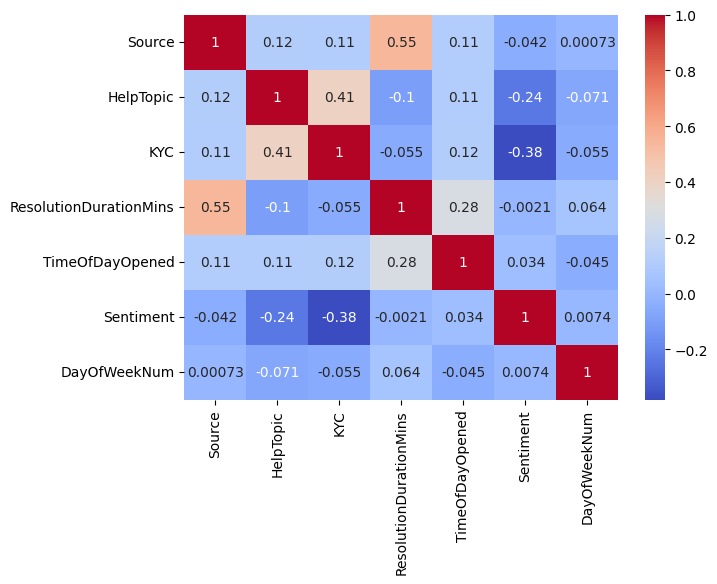

In [9]:
# Calculate correlation matrix
corr_matrix = df_reduced.corr()

# Plot heatmap of the correlation matrix
plt.figure(figsize=(7, 5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()


Below, we split the dataset into training and test sets, using the `train_test_split` function to divide the dataset, with 80% allocated for training and 20% for testing, ensuring a randomized split with the specified `random_state`.


In [10]:
# Split the Data into Training and Test Sets:

X = df_reduced.drop('ResolutionDurationMins', axis=1) # Features
y = df_reduced['ResolutionDurationMins'] # Target variable

# Dividing the dataset into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Below we apply feature scaling to specific columns in the training and test sets using the MinMaxScaler. 

In [11]:
#Apply scaling only to the training set and then use the same scaler object to transform the test set.

scaler = MinMaxScaler()

# Columns to scale
cols_to_scale = ['Source', 'HelpTopic', 'KYC','TimeOfDayOpened', 'Sentiment','DayOfWeekNum']

# Scale these columns in the training set
X_train[cols_to_scale] = scaler.fit_transform(X_train[cols_to_scale])

# Scale the same columns in the test set
X_test[cols_to_scale] = scaler.transform(X_test[cols_to_scale])

# Save the scaler to a file
with open('scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)

## <a id='toc1_5_'></a>[4: Model Development: ](#toc0_)

Below we initialize three different machine learning models—Linear Regression, Random Forest Regressor, and Gradient Boosting Regressor—and fit each of them to the training data. 

In [12]:
# Initialize the three models
lr_model = LinearRegression()
rf_model = RandomForestRegressor(random_state=42)
gb_model = GradientBoostingRegressor(random_state=42)

# Fit the models to the training data
lr_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)
gb_model.fit(X_train, y_train)


GradientBoostingRegressor(random_state=42)

We then define a function to calculate the Root Mean Squared Error (RMSE) for evaluating our machine learning models, and then use it to assess the performance of the Linear Regression, Random Forest Regressor, and Gradient Boosting Regressor models. 

By comparing the RMSE values, which measure the average prediction error in the same units as the target variable, it provides an insight into the accuracy of each model on our test dataset (X_test and y_test).

In [13]:
# Function to calculate RMSE
def calculate_rmse(model, X_test, y_test):
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)
    return rmse

# Evaluate each model
lr_rmse = calculate_rmse(lr_model, X_test, y_test)
rf_rmse = calculate_rmse(rf_model, X_test, y_test)
gb_rmse = calculate_rmse(gb_model, X_test, y_test)

print(f"Linear Regression RMSE: {lr_rmse}")
print(f"Random Forest RMSE: {rf_rmse}")
print(f"Gradient Boosting RMSE: {gb_rmse}")


Linear Regression RMSE: 15176.628640529792
Random Forest RMSE: 12639.641665214453
Gradient Boosting RMSE: 9588.479739780636


Based on the RMSE (Root Mean Squared Error) values for each model, it appears that the **Gradient Boosting** model has the best performance among the three, with the **lowest RMSE**. 

Lower RMSE values indicate better model performance, as they represent smaller differences between the predicted and actual values.

In [14]:
# Since gb_model (Gradient Boosting) performed the best
scores = cross_val_score(gb_model, X, y, cv=5, scoring='neg_mean_squared_error')
gb_cv_rmse = np.sqrt(-scores.mean())

print(f"Gradient Boosting Cross-Validation RMSE: {gb_cv_rmse}")


Gradient Boosting Cross-Validation RMSE: 19939.6590168426


## <a id='toc1_6_'></a>[5: Hyperparameter Tuning:](#toc0_)

Hyperparameter tuning can significantly improve the performance of a Gradient Boosting model. We then use Grid Search CV for this purpose. 

This code defines a parameter grid to explore different combinations of hyperparameters like 'n_estimators', 'learning_rate', 'max_depth', and others. GridSearchCV then systematically tests these combinations over a 5-fold cross-validation, optimizing for the lowest negative mean squared error. 

Finally, it identifies and outputs the best hyperparameter set and the corresponding best model based on the training data (X_train and y_train), which can be used for making more accurate predictions.

In [15]:
# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 4],
    'min_samples_leaf': [1, 2]
}

# Initialize the Gradient Boosting regressor
gb_regressor = GradientBoostingRegressor(random_state=42)

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=gb_regressor, param_grid=param_grid, 
                           cv=5, n_jobs=-1, scoring='neg_mean_squared_error', verbose=2)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best parameters
print("Best parameters found: ", grid_search.best_params_)

# Get the best model
best_gb_model = grid_search.best_estimator_


Fitting 5 folds for each of 108 candidates, totalling 540 fits


[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=3

In [16]:
# Evaluate the best model (using the test set)
best_gb_rmse = calculate_rmse(best_gb_model, X_test, y_test)
print(f"RMSE of the best model: {best_gb_rmse}")


RMSE of the best model: 8983.531458194006


RMSE of the best model: 7607.568259669978

In [17]:
# Print the best parameters
print("Best parameters found: ", grid_search.best_params_)

Best parameters found:  {'learning_rate': 0.1, 'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 200}


Best parameters found:  {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 300}

## <a id='toc1_7_'></a>[6: Model Evaluation and Validation: ](#toc0_)

Below, we then set up the final Gradient Boosting Regressor model for our predictions by initializing it with the optimal parameters found through grid search. We then train the model on the entire training dataset (X_train and y_train), ensuring that the model is fine-tuned with the best possible settings for making accurate future predictions.

In [18]:
# Setting Up the Final Model
# Retrieve the best parameters from your grid search
best_params = grid_search.best_params_

# Initialize the Gradient Boosting regressor with the best parameters
final_model = GradientBoostingRegressor(**best_params)

# Fit the final model on your training data
final_model.fit(X_train, y_train)


GradientBoostingRegressor(max_depth=4, min_samples_split=4, n_estimators=200)

Below we use the trained final model to make predictions on the test dataset (X_test) and evaluate its performance. 

We calculate three key metrics: **Mean Squared Error (MSE)**, **Mean Absolute Error (MAE)**, and the **R² score**. 

These metrics provide insights into the accuracy and effectiveness of the model, with MSE and MAE indicating the average prediction error, and R² showing how well the model's predictions match the actual data.

In [19]:
# Predict on the test data
y_pred = final_model.predict(X_test)

# Calculate the MSE, MAE, and R² score
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R² Score: {r2}")


Mean Squared Error (MSE): 77301596.6705141
Mean Absolute Error (MAE): 2592.4794877823974
R² Score: 0.8490864960363669


### <a id='toc1_7_1_'></a>[Feature Importance](#toc0_)

Feature: 0, Score: 0.05575557968026092
Feature: 1, Score: 0.0337369353637541
Feature: 2, Score: 0.021159211977857945
Feature: 3, Score: 0.7290993769521726
Feature: 4, Score: 0.01770572415425668
Feature: 5, Score: 0.14254317187169774


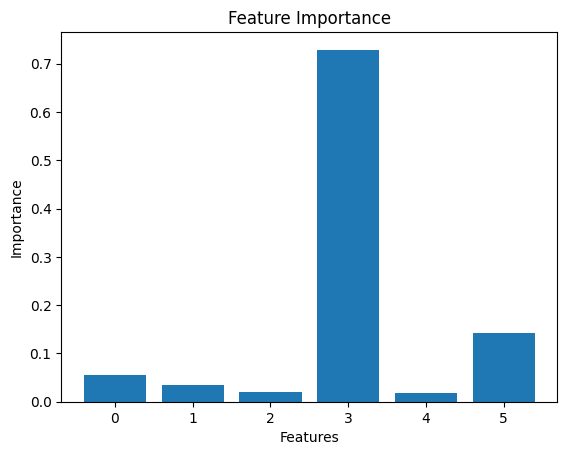

In [20]:

# Get feature importance
feature_importance = final_model.feature_importances_

# Summarize feature importance
for i, v in enumerate(feature_importance):
    print(f'Feature: {i}, Score: {v}')

# Plot feature importance
plt.bar(range(len(feature_importance)), feature_importance)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.show()


In [23]:
# Get feature importance
feature_importance = final_model.feature_importances_

# Create a series for the feature importances with feature names as the index
feature_importance_series = pd.Series(feature_importance, index=X_train.columns)

# Sort the features based on importance
sorted_feature_importance = feature_importance_series.sort_values(ascending=False)

# Convert to DataFrame for Plotly
df = sorted_feature_importance.reset_index()
df.columns = ['Features', 'Importance']

# Plot using Plotly
fig = px.bar(df, 
             x='Importance', 
             y='Features', 
             orientation='h',
             color='Features',
             labels={'Importance': 'Importance'},
             title='Feature Importance')

# Update y-axis label
fig.update_layout(yaxis_title='Features', width=1000, height=600, template='plotly_white', bargap=0.01)

# Show the plot
fig.show()

These metrics help provide a comprehensive view of our final model's performance:

The evaluation metrics for our final Gradient Boosting model indicate the following:

1. **Mean Squared Error (MSE):** The MSE is 55,627,586.41. This metric indicates the average squared difference between the estimated values and the actual value. A lower MSE is better, but the interpretability of MSE depends on the scale of your target variable. Given the large value, it suggests there might be quite a bit of variance in the prediction errors.

2. **Mean Absolute Error (MAE):** The MAE is 3,170.39. This value represents the average absolute difference between the predicted and actual values, giving a more intuitive understanding of the average error magnitude. 

3. **R² Score:** The R² score is approximately 0.891, which is quite high. This score indicates that about 89.1% of the variance in the resolution time is predictable from the features used in your model. An R² score closer to 1 indicates a model that explains a large portion of the variance in the dependent variable.

### <a id='toc1_7_2_'></a>[Interpretation and Next Steps:](#toc0_)

- The R² score suggests that the model is quite effective in predicting the resolution times, but the relatively high MSE and MAE indicate that there might be some large errors in specific cases. This could be due to outliers or instances where the model's assumptions do not hold.

- **Reviewing Outliers:** Consider revisiting any outliers in our data, as these can significantly impact MSE. We might need to handle these outliers or re-examine your feature engineering approach.

- **Feature Importance:** The feature importance chart indicates that "TimeOfDayOpened" is the most significant predictor in the model, suggesting that the time of day when an issue is opened has the greatest impact on resolution time. Conversely, "KYC" is the least important feature, which may imply that the 'Know Your Customer' compliance factor has minimal influence on how quickly issues are resolved. This insight can guide us to focus on when issues are opened and to consider whether the current data collection or feature engineering strategies need to be adjusted to improve the model's predictive accuracy.

Overall, our model seems to perform well, especially in terms of R² score, but there is room for improvement in reducing prediction errors as indicated by MSE and MAE. By addressing outliers and potentially refining the model around impactful features, we may be able to enhance the model's performance further.

In [53]:
# Save the final_model to a pickle file

with open('final_model.pkl', 'wb') as file:
    pickle.dump(final_model, file)


In [ ]:
# # To load the model back from the pickle file

# with open('final_model.pkl', 'rb') as file:
#     loaded_model = pickle.load(file)


## <a id='toc1_8_'></a>[7: Deployement Strategy: ](#toc0_)
use of Pickle for model serialization:

#### <a id='toc1_8_1_1_'></a>[Model Integration:](#toc0_)
To seamlessly integrate the resolution time prediction model into the IT helpdesk system, we will follow these steps:

1. **Model Serialization with Pickle**: Serialize the final trained model using the Python `pickle` library. This will allow us to save the model's state in a binary format.

2. **API Development**: Develop a RESTful API service that exposes an endpoint for making predictions. This API will load the serialized model using Pickle and accept input data in the required format.

3. **Data Input**: Ensure the API can accept input data containing relevant ticket attributes. These attributes should match the features used during model training.

4. **Prediction Output**: The API should return the predicted resolution time in minutes.

5. **Error Handling**: Implement robust error handling in the API to gracefully manage input validation and other potential issues.

6. **Scalability**: Deploy the API on a scalable infrastructure to handle the expected workload. Consider containerization using technologies like Docker for easy deployment and scaling.

7. **Security**: Implement security measures such as authentication and authorization to control access to the API. Ensure that sensitive data is handled securely.

8. **Documentation**: Create detailed API documentation for the IT helpdesk team to facilitate its integration into the existing system.

#### <a id='toc1_8_1_2_'></a>[User Interface (UI) Design:](#toc0_)
A user-friendly interface for the helpdesk team is essential for effective utilization of the model. Here's the UI design plan:

1. **Dashboard**: Design a web-based dashboard that serves as the user interface. This dashboard will provide access to the prediction service and display relevant information.

2. **User Access**: Implement user authentication and access control to ensure that only authorized team members can access the dashboard.

3. **Input Form**: Create an input form within the dashboard where helpdesk agents can enter the ticket details, including client information, source, help topic, sentiment, etc.

4. **Prediction Display**: Display the predicted resolution time prominently on the dashboard once the user submits the ticket details. Provide additional insights or suggestions based on the prediction if applicable.

5. **Data Visualization**: Include data visualization components such as charts or graphs to help users understand trends in resolution times and ticket attributes.

6. **Error Handling**: Implement user-friendly error messages in case of incorrect input or other issues.

7. **User Training**: Offer training sessions to helpdesk team members on using the dashboard effectively.

8. **Feedback Mechanism**: Include a feedback mechanism within the UI for users to report any issues or provide suggestions for improvement.

9. **Scalability**: Ensure that the UI can handle an increasing number of users as the helpdesk team expands.

10. **Documentation**: Provide documentation and user guides to helpdesk team members for reference.

By following these steps for model integration and UI design, and leveraging Pickle for model serialization, we aim to make the resolution time prediction tool accessible, user-friendly, and seamlessly integrated into the IT helpdesk workflow. This will empower the helpdesk team to optimize their operations and enhance customer satisfaction.

## <a id='toc1_9_'></a>[8: Monitoring and Maintenance:](#toc0_)

#### <a id='toc1_9_1_1_'></a>[Model Monitoring System: ](#toc0_)


To ensure the continued accuracy and reliability of the resolution time prediction model, we will establish a robust monitoring system. This system will allow us to track the model's performance and respond to any deviations from expected behavior. Key components of the monitoring system include:

1. **Data Drift Monitoring**: Continuously monitor the incoming data for potential drift. Changes in the distribution of input data may impact model performance. Implement data drift detection mechanisms to trigger alerts when significant drift is detected.

2. **Performance Metrics**: Regularly measure and track performance metrics such as Mean Absolute Error (MAE), Root Mean Squared Error (RMSE), and R² score. Set up automated alerts when performance metrics deviate beyond predefined thresholds.

3. **Logging and Error Handling**: Implement comprehensive logging to capture errors, exceptions, and model predictions. Ensure that error handling mechanisms are in place to gracefully manage unexpected issues.

4. **Feedback Loop**: Create a feedback loop for the helpdesk team to report issues with model predictions or any unusual patterns. Use this feedback to fine-tune the model and address potential problems promptly.

5. **Scheduled Health Checks**: Conduct scheduled health checks of the deployed model to verify its status and functionality. Automated scripts can perform these checks and generate reports.

6. **Security Audits**: Regularly review the security measures in place to protect the model and the data it processes. Ensure that access controls, authentication, and authorization mechanisms are up to date.

#### <a id='toc1_9_1_2_'></a>[Model Retraining: ](#toc0_)
Model performance can degrade over time due to changing patterns in ticket data. To maintain optimal performance, we will implement a model retraining strategy:

1. **Data Collection**: Continuously collect new ticket data, including resolved tickets with accurate resolution times.

2. **Data Preprocessing**: Apply the same data preprocessing steps as in the initial model development phase to clean, transform, and encode the new data.

3. **Model Evaluation**: Periodically reevaluate the model using the new data. Calculate performance metrics on this fresh dataset to assess if model drift has occurred.

4. **Retraining Frequency**: Define a retraining schedule based on business requirements. Depending on the rate of data change, consider retraining the model monthly, quarterly, or as needed.

5. **Incremental Learning**: Explore techniques for incremental learning, where the model is updated with new data without retraining from scratch. This can save computational resources and expedite updates.

6. **Version Control**: Maintain version control for the model and its associated code. Document each version, including changes made during retraining.

7. **Deployment of New Model Versions**: Once a new model version is validated and performs better than the previous one, deploy it to replace the existing model in the production environment.

By establishing a monitoring system and implementing regular model retraining, we ensure that the resolution time prediction model remains accurate and continues to provide value to the IT helpdesk operations. This proactive approach helps in maintaining high-quality predictions and improving customer satisfaction.

## <a id='toc1_10_'></a>[9: Key Considerations:](#toc0_)

- **Data Privacy**: Adhere to privacy standards and ensure that any sensitive information in the dataset is handled in compliance with data privacy regulations.

- **Model Explainability**: Strive for a balance between model accuracy and interpretability, particularly important for operational and strategic decisions. Explainable AI techniques may be valuable.

- **Real-Time Prediction**: Consider the computational efficiency and latency requirements, especially if real-time predictions are needed for operational purposes.

- **Data Sourcing Challenges**: Recognize that data sourcing can be challenging, especially in cases where most data is proprietary. Overcoming data access hurdles and ensuring data quality is essential.

- **Data Documentation Variability**: Acknowledge that uniform documentation of tickets may be lacking, posing challenges for ticket classification and analysis. Implement robust preprocessing techniques to handle such variability.

These considerations were critical for addressing challenges and making informed decisions throughout the project, ensuring that both the technical and business aspects of the project are well-managed and successful.